In [14]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from imblearn.under_sampling import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

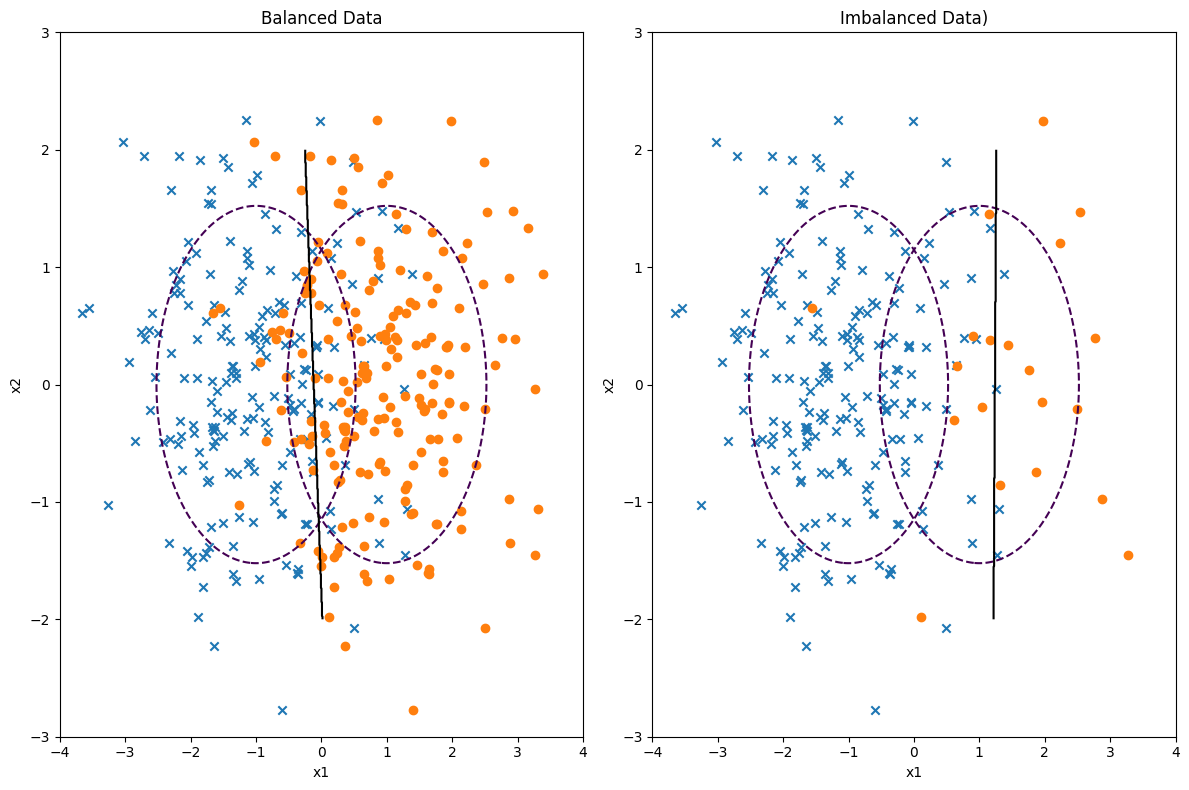

In [16]:
def classification_result(n0, n1, title=""):
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])

    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)

    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)

    return model, X, y, y_pred

plt.figure(figsize=(12,8))    
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "Balanced Data")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "Imbalanced Data")
plt.tight_layout()
plt.savefig('Imbalanced Data Sample')
plt.show()

In [19]:
n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

In [21]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

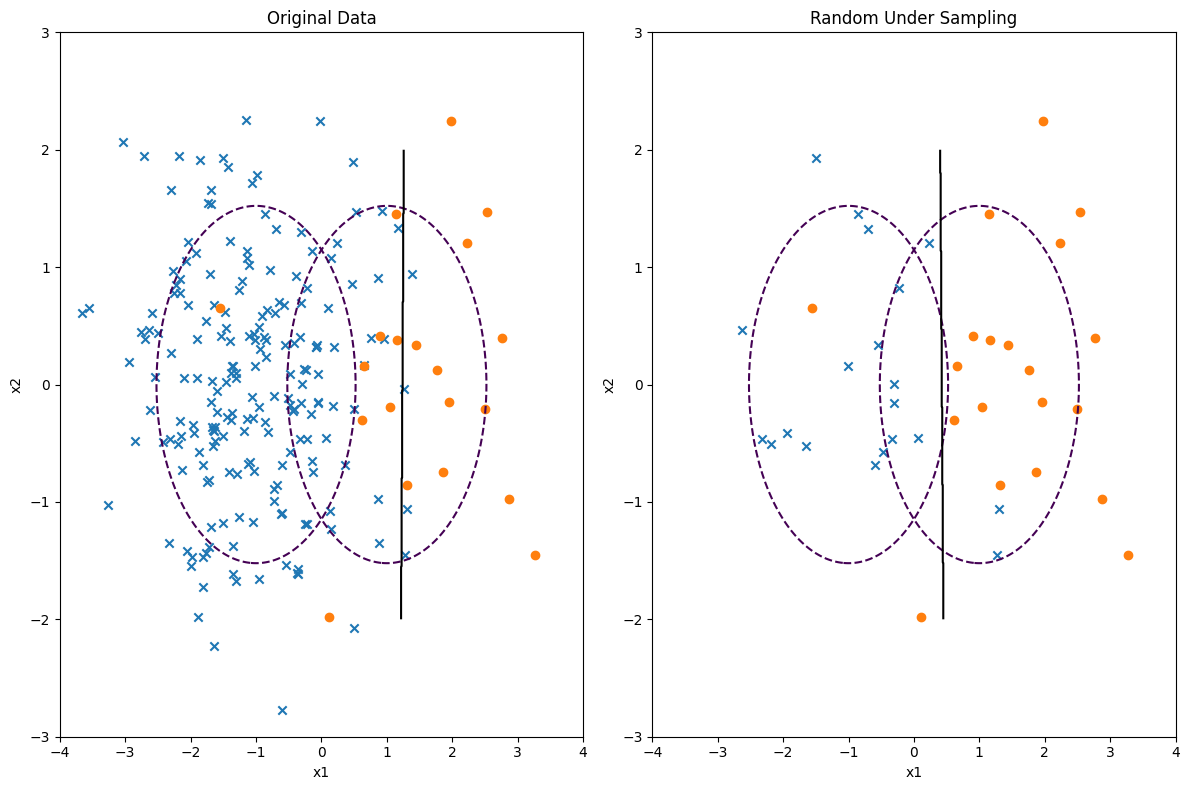

In [33]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Random Under Sampling')
plt.savefig('Random Under Sampling')
plt.tight_layout()
plt.show()

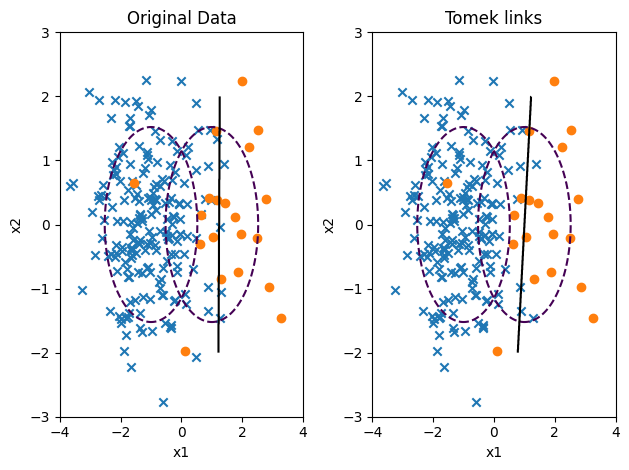

In [34]:
X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Tomek links')
plt.savefig('Tomek links')
plt.tight_layout()
plt.show()

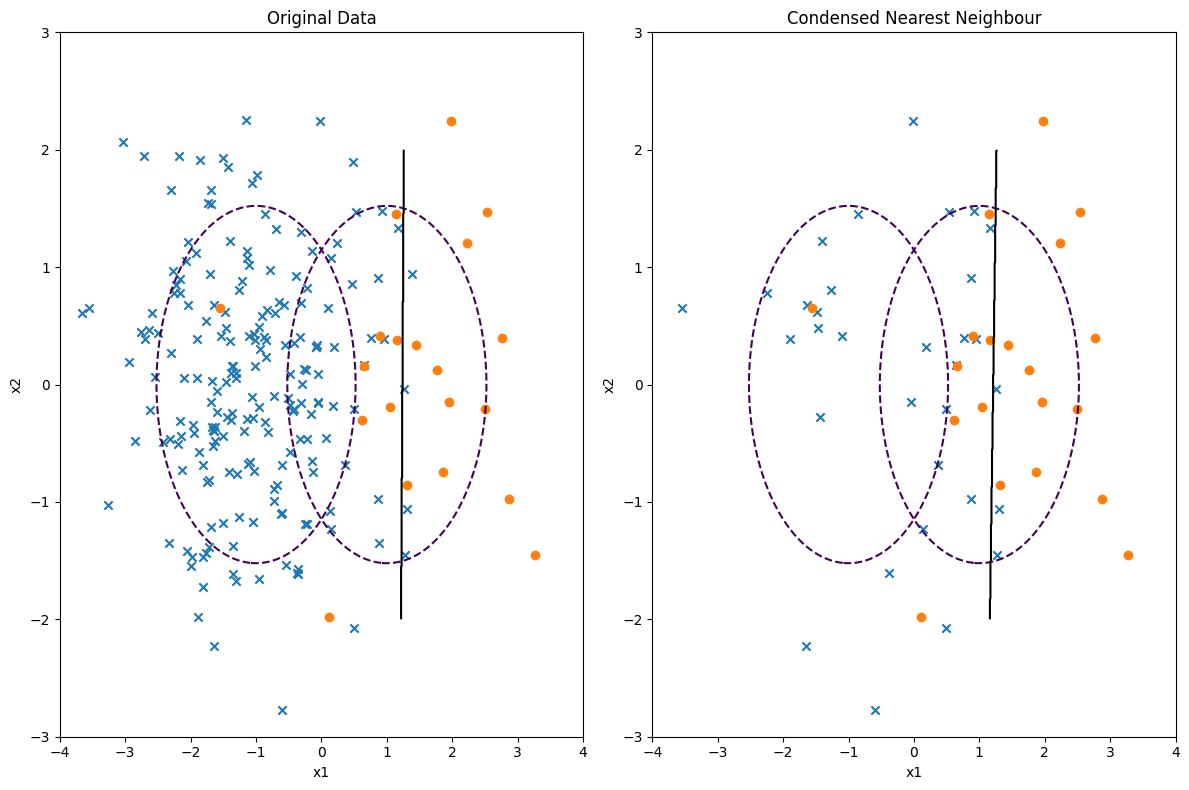

In [36]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Condensed Nearest Neighbour')
plt.savefig('Condensed Nearest Neighbour')
plt.tight_layout()
plt.show()

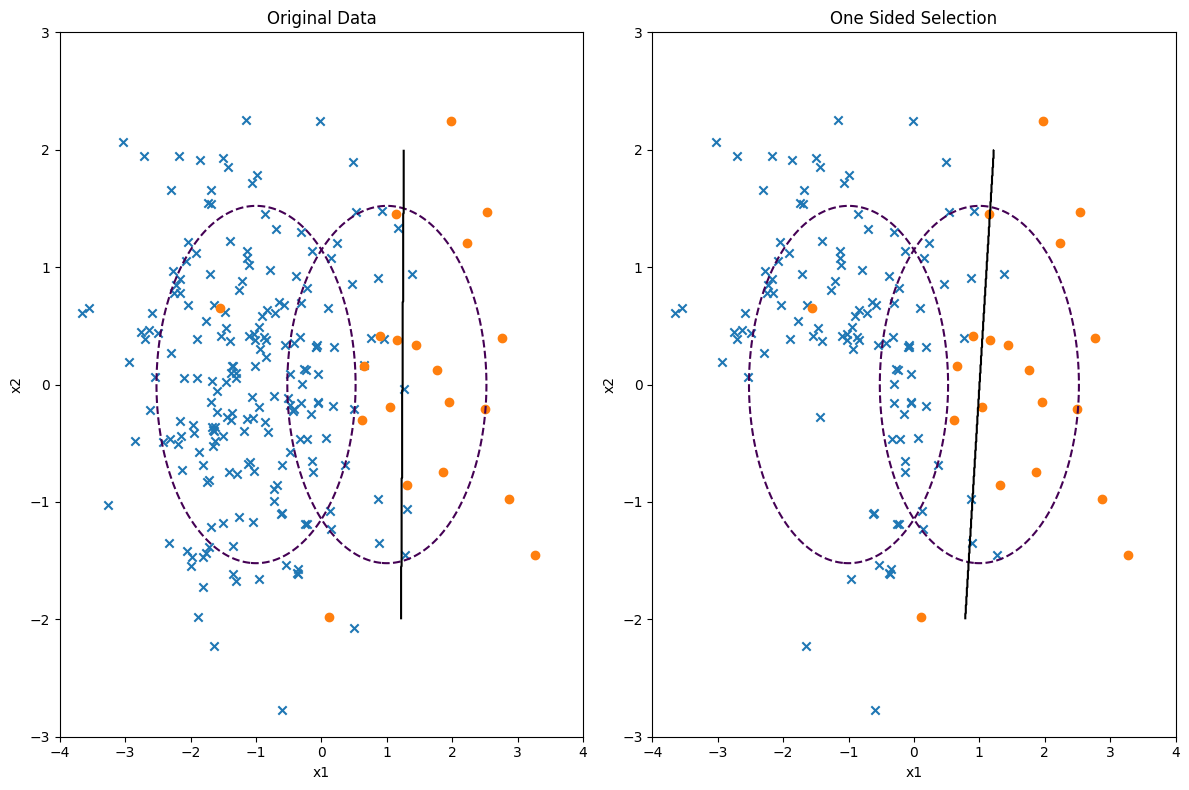

In [37]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('One Sided Selection')
plt.savefig('One Sided Selection')
plt.tight_layout()
plt.show()

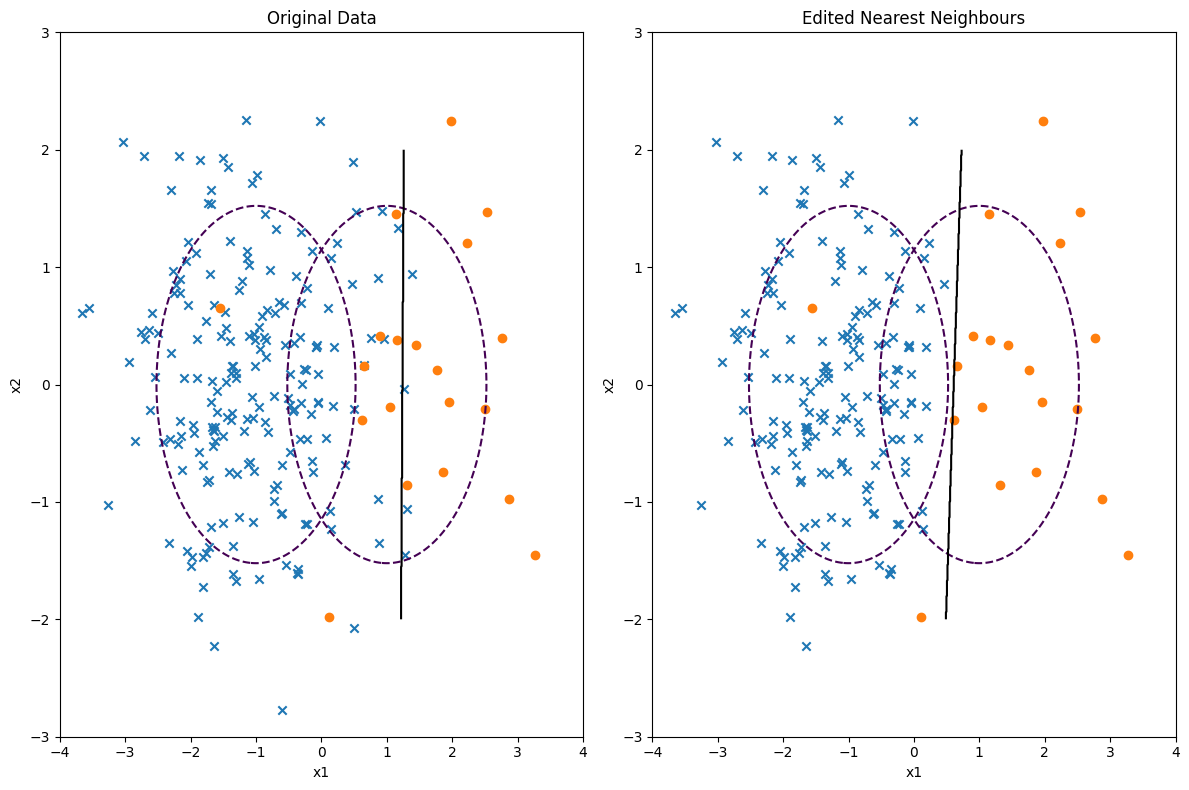

In [48]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Edited Nearest Neighbours')
plt.savefig('Edited Nearest Neighbours')
plt.tight_layout()
plt.show()

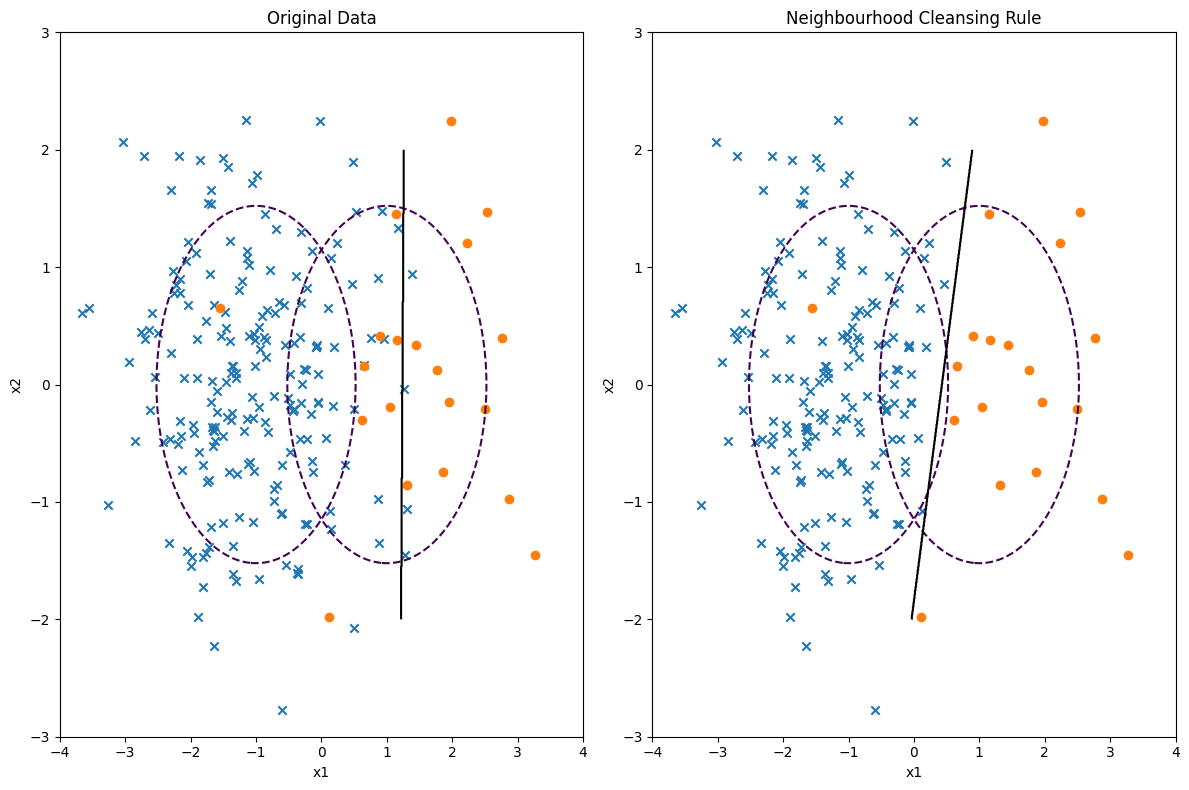

In [50]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Neighbourhood Cleansing Rule')
plt.savefig('Neighbourhood Cleansing Rule')
plt.tight_layout()
plt.show()

In [52]:
from imblearn.over_sampling import *

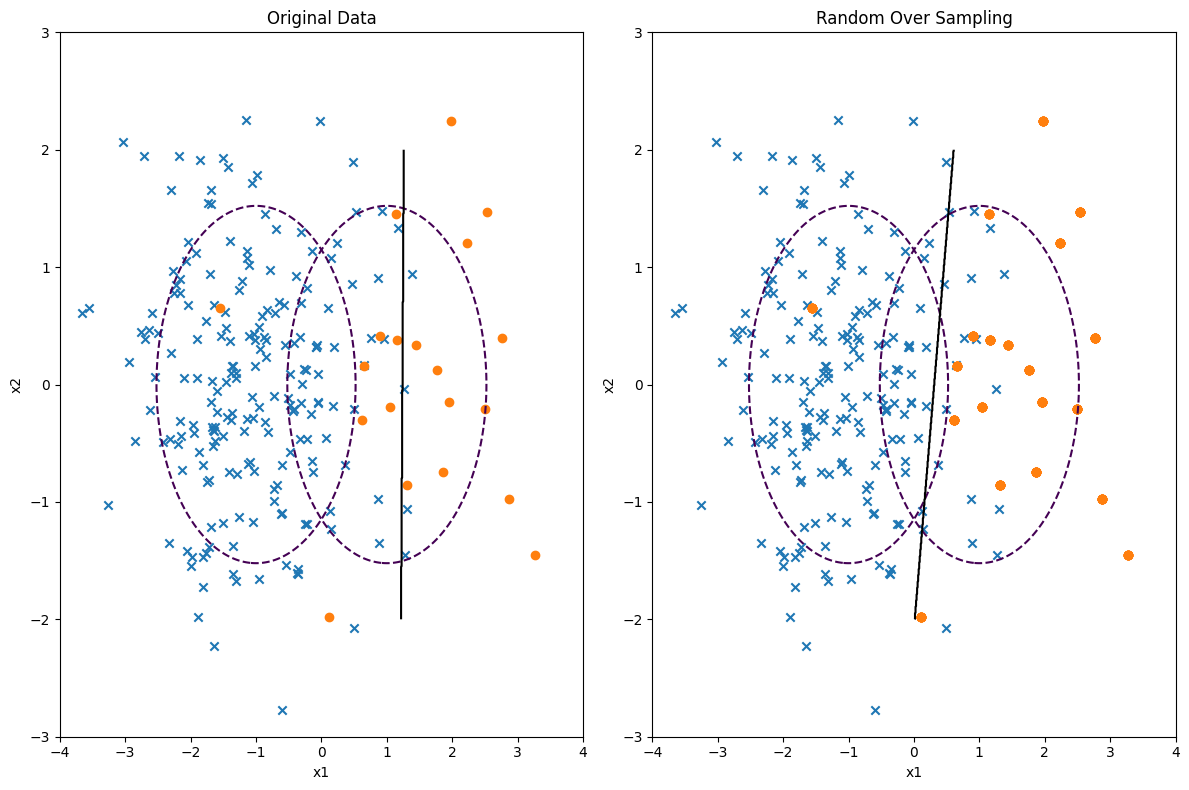

In [53]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Random Over Sampling')
plt.savefig('Random Over Sampling')
plt.tight_layout()
plt.show()

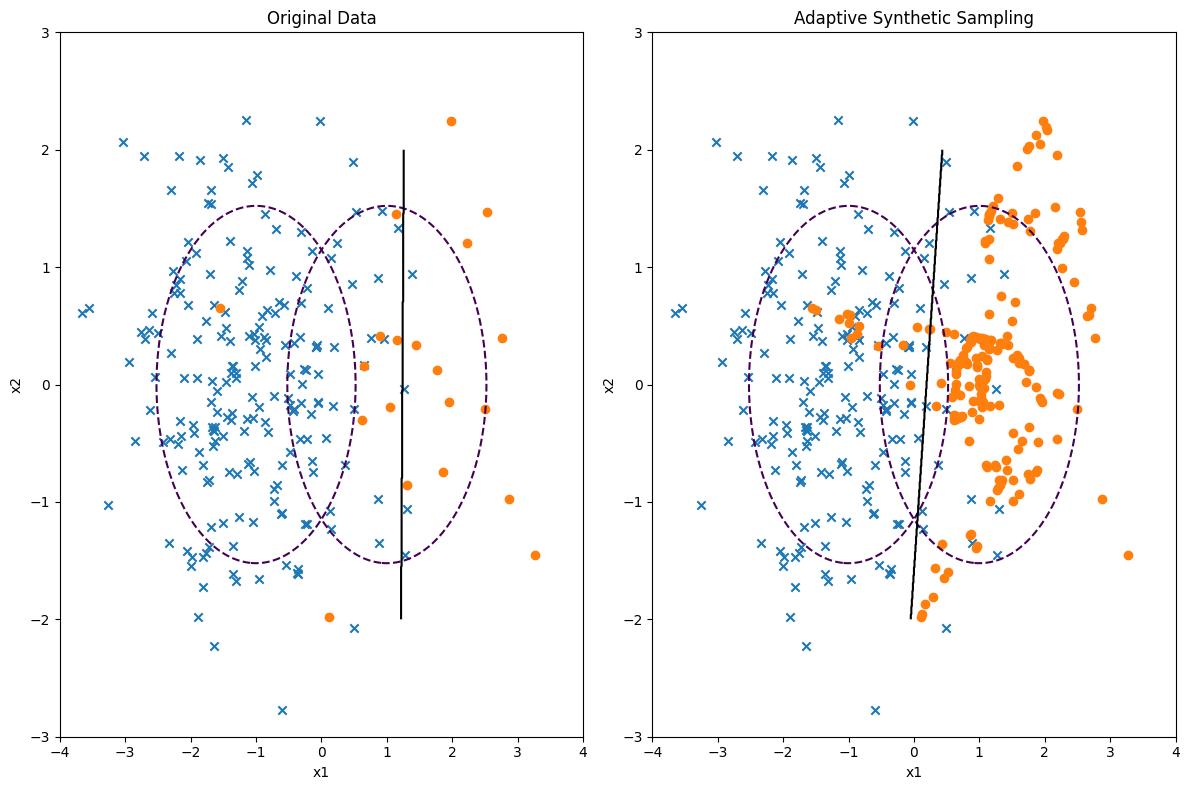

In [55]:
X_samp, y_samp = ADASYN(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Adaptive Synthetic Sampling')
plt.savefig('Adaptive Synthetic Sampling')
plt.tight_layout()
plt.show()

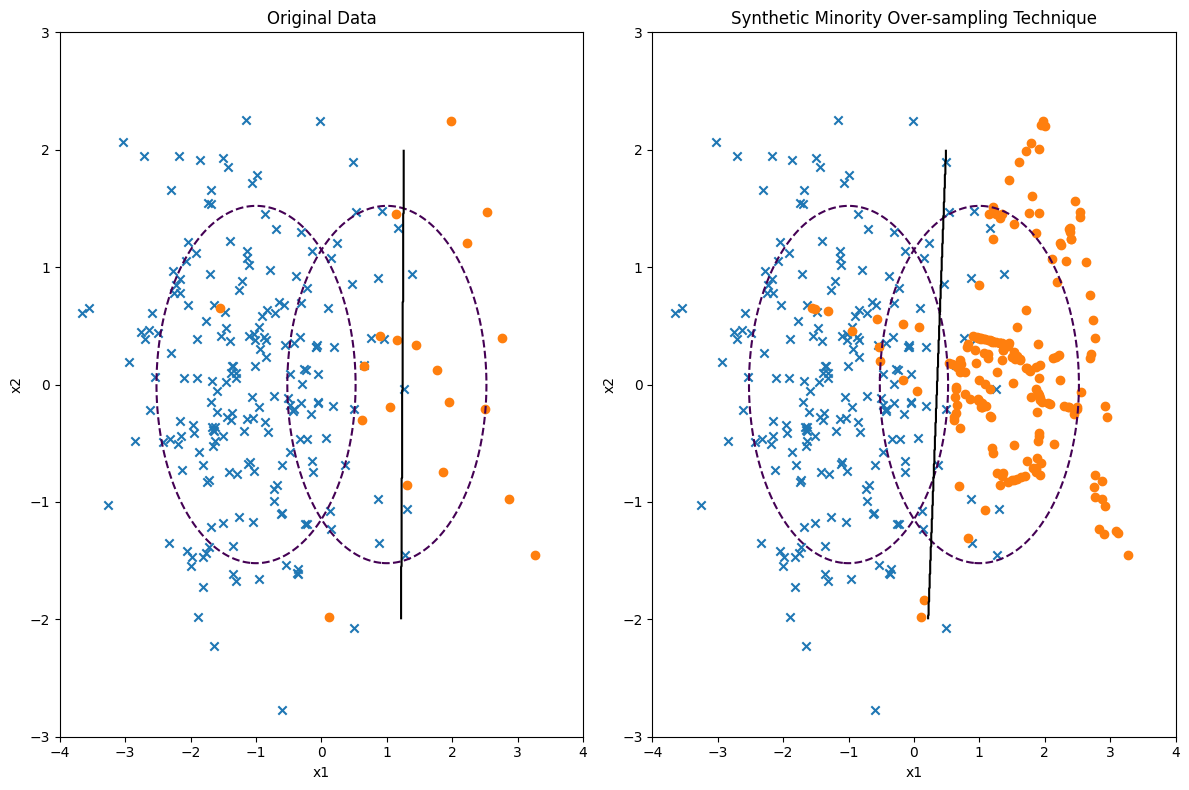

In [58]:
X_samp, y_samp = SMOTE(random_state=4).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('Synthetic Minority Over-sampling Technique')
plt.savefig('Synthetic Minority Over-sampling Technique')
plt.tight_layout()
plt.show()

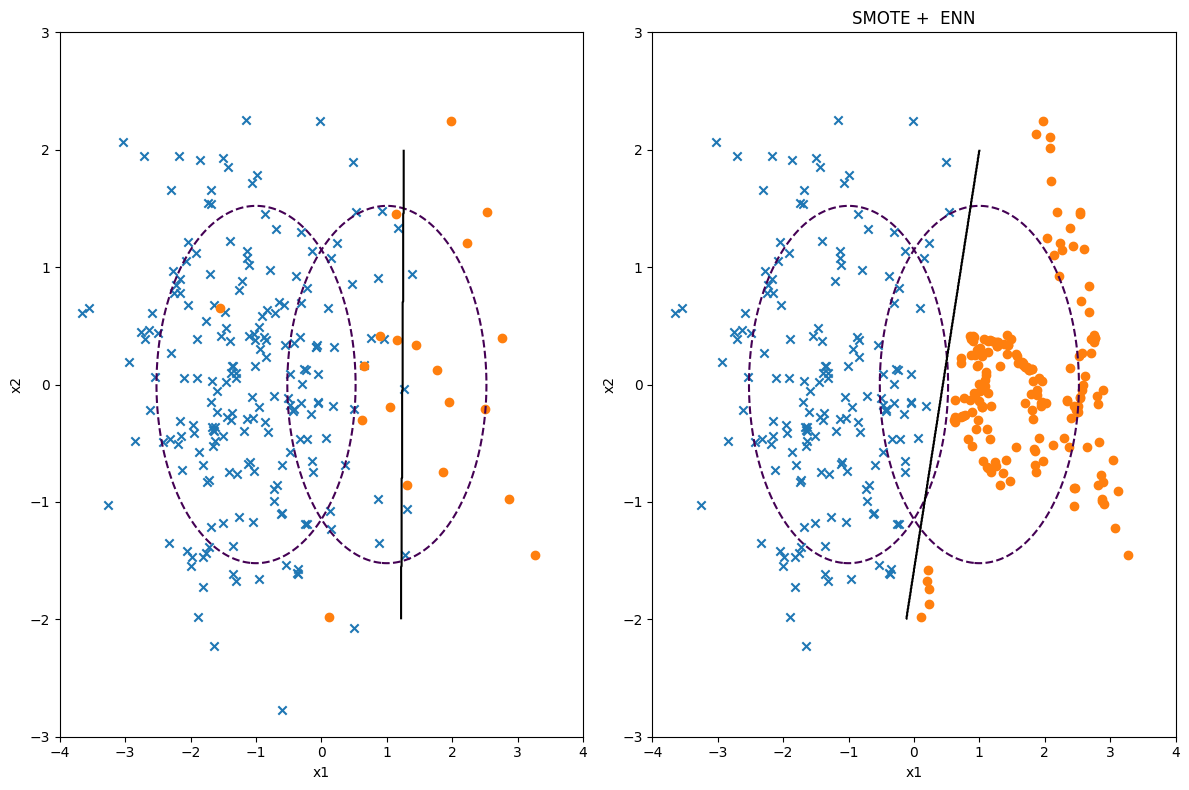

In [66]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

X_samp, y_samp = SMOTEENN(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.title('Original Data')
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('SMOTE +  ENN')
plt.savefig('SMOTE +  ENN')
plt.tight_layout()
plt.show()

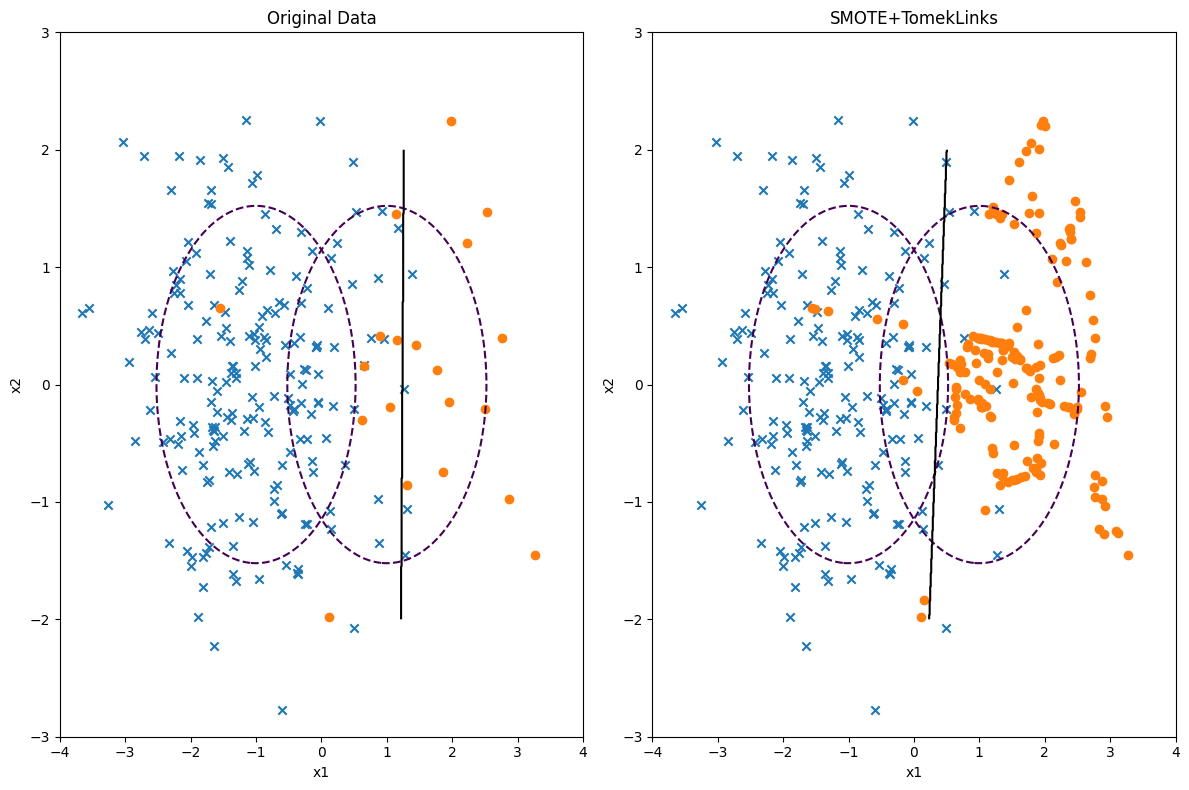

In [67]:
X_samp, y_samp = SMOTETomek(random_state=4).fit_resample(X_imb, y_imb)

plt.figure(figsize=(12,8))
plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.title('Original Data')
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.title('SMOTE+TomekLinks')
plt.savefig('SMOTE+TomekLinks')
plt.tight_layout()
plt.show()